# Pandas and Datetimes

Pandas helps ease the pain of timezones, even as it provides many useful tools for generating ```DateTimeIndex``` based time Series.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [11]:
rng = pd.date_range('3/9/2012 9:30', periods=10, freq='D')

In [12]:
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-17 09:30:00', '2012-03-18 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [13]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
rng2 = pd.date_range('3/9/2012 9:30', periods=6, freq='M')

In [15]:
rng2

DatetimeIndex(['2012-03-31 09:30:00', '2012-04-30 09:30:00',
               '2012-05-31 09:30:00', '2012-06-30 09:30:00',
               '2012-07-31 09:30:00', '2012-08-31 09:30:00'],
              dtype='datetime64[ns]', freq='M')

In [19]:
ts = Series(np.random.randn(len(rng)), index=rng)
type(ts)
len(rng)

10

In [26]:
ts

2012-03-09 09:30:00    2.702059
2012-03-10 09:30:00    0.595437
2012-03-11 09:30:00    2.720095
2012-03-12 09:30:00    0.268932
2012-03-13 09:30:00   -0.984892
2012-03-14 09:30:00   -1.145879
2012-03-15 09:30:00   -0.214099
2012-03-16 09:30:00    0.487290
2012-03-17 09:30:00   -1.516585
2012-03-18 09:30:00   -1.350592
Freq: D, dtype: float64

In [21]:
ts.index.tz

In [22]:
rng.tz

In [23]:
ts_utc = ts.tz_localize('UTC')

In [24]:
ts_utc.index.tz

<UTC>

In [25]:
ts_utc

2012-03-09 09:30:00+00:00    2.702059
2012-03-10 09:30:00+00:00    0.595437
2012-03-11 09:30:00+00:00    2.720095
2012-03-12 09:30:00+00:00    0.268932
2012-03-13 09:30:00+00:00   -0.984892
2012-03-14 09:30:00+00:00   -1.145879
2012-03-15 09:30:00+00:00   -0.214099
2012-03-16 09:30:00+00:00    0.487290
2012-03-17 09:30:00+00:00   -1.516585
2012-03-18 09:30:00+00:00   -1.350592
Freq: D, dtype: float64

In [27]:
ts_pacific = ts_utc.tz_convert('US/Pacific')
ts_pacific

2012-03-09 01:30:00-08:00    2.702059
2012-03-10 01:30:00-08:00    0.595437
2012-03-11 01:30:00-08:00    2.720095
2012-03-12 02:30:00-07:00    0.268932
2012-03-13 02:30:00-07:00   -0.984892
2012-03-14 02:30:00-07:00   -1.145879
2012-03-15 02:30:00-07:00   -0.214099
2012-03-16 02:30:00-07:00    0.487290
2012-03-17 02:30:00-07:00   -1.516585
2012-03-18 02:30:00-07:00   -1.350592
Freq: D, dtype: float64

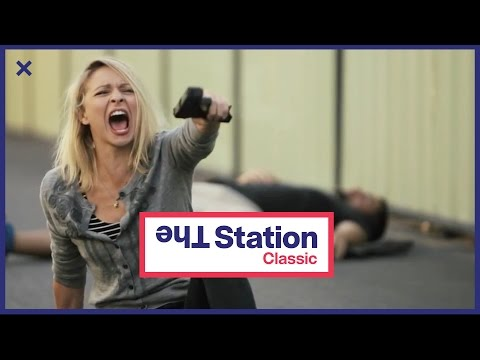

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo("k4EUTMPuvHo")

In [29]:
ts_eastern = ts_pacific.tz_convert('US/Eastern')
ts_eastern

2012-03-09 04:30:00-05:00    2.702059
2012-03-10 04:30:00-05:00    0.595437
2012-03-11 05:30:00-04:00    2.720095
2012-03-12 05:30:00-04:00    0.268932
2012-03-13 05:30:00-04:00   -0.984892
2012-03-14 05:30:00-04:00   -1.145879
2012-03-15 05:30:00-04:00   -0.214099
2012-03-16 05:30:00-04:00    0.487290
2012-03-17 05:30:00-04:00   -1.516585
2012-03-18 05:30:00-04:00   -1.350592
Freq: D, dtype: float64

In [30]:
ts_berlin = ts_pacific.tz_convert('Europe/Berlin')
ts_berlin

2012-03-09 10:30:00+01:00    2.702059
2012-03-10 10:30:00+01:00    0.595437
2012-03-11 10:30:00+01:00    2.720095
2012-03-12 10:30:00+01:00    0.268932
2012-03-13 10:30:00+01:00   -0.984892
2012-03-14 10:30:00+01:00   -1.145879
2012-03-15 10:30:00+01:00   -0.214099
2012-03-16 10:30:00+01:00    0.487290
2012-03-17 10:30:00+01:00   -1.516585
2012-03-18 10:30:00+01:00   -1.350592
Freq: D, dtype: float64

# Timestamp type (for individual datetimes)

In [31]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [32]:
stamp2 = pd.Timestamp('Wed May 23 11:35:54 2018') # will this work too?

In [33]:
type(stamp2)

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
stamp2_pac = stamp2.tz_localize('US/Pacific')
stamp2_pac

Timestamp('2018-05-23 11:35:54-0700', tz='US/Pacific')

In [35]:
stamp2_pac.tz_convert('Europe/Moscow')

Timestamp('2018-05-23 21:35:54+0300', tz='Europe/Moscow')

In [36]:
stamp2_pac.value # nanoseconds since the UNIX Epoch, Jan 1 1970

1527100554000000000

In [37]:
stamp2_pac.tz_convert('Europe/Moscow').value

1527100554000000000

In [38]:
stamp3 = pd.Timestamp('Wed May 23 11:35:54 1950') 

In [39]:
stamp3.value  # negative number because before the UNIX Epoch

-618841446000000000

In [40]:
ts

2012-03-09 09:30:00    2.702059
2012-03-10 09:30:00    0.595437
2012-03-11 09:30:00    2.720095
2012-03-12 09:30:00    0.268932
2012-03-13 09:30:00   -0.984892
2012-03-14 09:30:00   -1.145879
2012-03-15 09:30:00   -0.214099
2012-03-16 09:30:00    0.487290
2012-03-17 09:30:00   -1.516585
2012-03-18 09:30:00   -1.350592
Freq: D, dtype: float64

In [41]:
ts_sum = ts_eastern + ts_utc.tz_convert("Europe/Moscow")

In [42]:
ts_sum.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

### LAB CHALLENGE

What time is it right now in:

* Moscow
* Berlin
* Tokyo

In [51]:
right_now = pd.Timestamp.now(tz='US/Pacific')  #  getting you started

In [53]:
print("California", right_now)
print("Moscow    ", right_now.tz_convert('Europe/Moscow'))
print("Berlin    ", right_now.tz_convert('Europe/Berlin'))
print("Tokyo     ", right_now.tz_convert('Asia/Tokyo'))

California 2018-05-23 21:46:40.670918-07:00
Moscow     2018-05-24 07:46:40.670918+03:00
Berlin     2018-05-24 06:46:40.670918+02:00
Tokyo      2018-05-24 13:46:40.670918+09:00
